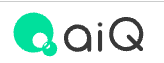

[disclaimer](../../disclaimer.txt/)

# aiQ Geolocation Reit Data Loader Demo

### Step1: Import Library

In [1]:
import os
import numpy as np
import pandas as pd

from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.ALTERNATIVE import (
    load_alternative_aiq_geolocation_reit_universe,
    load_alternative_aiq_geolocation_reit_place_id,
    load_alternative_aiq_geolocation_reit_data
)

In [2]:
ENV_DATABSE = 'TRIAL_SNOWFLAKE_DATABASE_AIQ_GEOLOCATION_REIT'
db_name = os.environ.get(ENV_DATABSE)

## Step2: Define Universe from Alt Data

### `load_alternative_aiq_geolocation_reit_universe`  

In [3]:
sdh = DAL()
load_alternative_aiq_geolocation_reit_universe(sdh, language='JP', ticker = '3309', db_name=db_name).retrieve()

,LEI,PERM_ID,FIGI,TICKER,COMPANY_NAME
0,None,1-5044031169,BBG007G5JZ43,3309,積水ハウス・リート投資法人


### Data Access handler load
Load the data to memory

same return as **load_alternative_aiq_geolocation_reit_universe** 
```
load_alternative_aiq_geolocation_reit_universe(sdh, language='EN', ticker = '1332').retrieve()
```

In [4]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_geolocation',
    meta_data='universe',
    language='EN', 
    ticker = ['3309'],
    db_name=db_name,
    schema_name='AIQ_GEOLOCATION_REIT'
)
dfsyms = sdh.retrieve()
dfsyms

,LEI,PERM_ID,FIGI,TICKER,COMPANY_NAME
0,None,1-5044031169,BBG007G5JZ43,3309,Sekisui House Reit Inc


## Step2: Define Place ID from Alt Data
aiQ Geolocation Reit allows you to have granular views on activities at each place of your interest. <br>
Here is how you can find by ticker which places are covered within the dataset.

### `load_alternative_aiq_geolocation_reit_place_id`  

In [5]:
load_alternative_aiq_geolocation_reit_place_id(sdh, language='JP', ticker = '3309', db_name=db_name).retrieve().head()

,TICKER,FIGI,PLACE_ID,FACILITY_NAME,PREFECTURE,FACILITY_ADDRESS,SECTOR,SECTOR_NAME
0,3309,BBG007G5JZ43,ChIJ__9Py5eSGGARsNZtx4pff1c_3309,エスティメゾン板橋区役所前,東京都,東京都 板橋区 板橋2-46-11,None,None
1,3309,BBG007G5JZ43,ChIJrRWEcViKGGAReLKbRyposhc_3309,プライムメゾン御殿山ウエスト,東京都,東京都 品川区 北品川6-5-8,None,None
2,3309,BBG007G5JZ43,ChIJA6GiAEp3A2ARxZ6Vgu4hxNk_3309,エスティメゾン東別院,愛知県,愛知県 名古屋市 中区松原3-16-4,None,None
3,3309,BBG007G5JZ43,ChIJFwFKG06LGGARwu34i_6IZRE_3309,プライムメゾン代官山,東京都,東京都 目黒区 青葉台1-9-6,None,None
4,3309,BBG007G5JZ43,ChIJt20yQ2iLGGARppKUWe1hTrQ_3309,エスティメゾン恵比寿Ⅱ,東京都,東京都 渋谷区 東4-13-1,None,None


### Data Access handler load

You can achieve the same thing by using `load` method of `sdh` with meta_data=`place_id` set.

In [6]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_geolocation',
    meta_data='place_id',
    language='EN', 
    ticker = ['3309'],
    db_name=db_name,
    schema_name='AIQ_GEOLOCATION_REIT'
)
dfplaceid = sdh.retrieve()
dfplaceid.head()

,TICKER,FIGI,PLACE_ID,FACILITY_NAME,PREFECTURE,FACILITY_ADDRESS,SECTOR,SECTOR_NAME
0,3309,BBG007G5JZ43,ChIJs_WRbKmTQTURGMZg4vzRtJI_3309,Prime Maison Momochihama,Fukuoka,"Japan, 814-0001 Fukuoka, Sawara Ward, Momochih...",None,None
1,3309,BBG007G5JZ43,ChIJoZMtdHaNGGAR8KwWPJPR6Ow_3309,Prime Maison Otsuka,Tokyo,"1-15-1 Kita-Otsuka, Toshima-ku, Tokyo",None,None
2,3309,BBG007G5JZ43,ChIJ6ZMiROnyGGARn8QpTpSWwOM_3309,Estee Maison Shin-Nakano,Tokyo,"Japan, 164-0012 Tokyo, Nakano City, Honchō, 6-...",None,None
3,3309,BBG007G5JZ43,ChIJx9TvbniNGGARW4JL-o6oj9Q_3309,Estee Maison Sugamo,Tokyo,"4-chōme-14-15 Sugamo, Toshima City, Tokyo 170-...",None,None
4,3309,BBG007G5JZ43,ChIJX1nhznuKGGARaNOUlmgQNgk_3309,Esty Maison Oi Sendaizaka,Tokyo,"Japan, 140-0011 Tokyo, Shinagawa City, Higashi...",None,None



## Step4: Load Alternative Data
### `load_alternative_aiq_geolocation_reit_data`  

Finally we use this method to load the actual time series data. <br>
You can select data by `ticker` or `place_id`.
- 'geofence': observations for 24 hours basis
- 'geofence_ot': observations for only mid night hours (11pm to 5am in Japan)


In [7]:
sdh = load_alternative_aiq_geolocation_reit_data(
        sdh,
        ticker=['3309'],
        # place_id=None,　`ticker` and `place_id` cannot be specified at the same time; they are mutually exclusive　
        variable = ['geofence', 'geofence_ot'],
        load_only_raw=True,
        load_only_latest=True,
        db_name=db_name
    )
df_pos = sdh.retrieve()
df_pos.head()

,TICKER,PLACE_ID,DATETIME,SMOOTH,VARIABLE,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,3309,ChIJ9f04oJopC18Rsb9gZrJl0do_3309,2014-07-01,0,geofence,NaN,0,2024-06-08 08:14:07
1,3309,ChIJM-MSThlxA2AR-ponUOz0gXg_3309,2014-07-01,0,geofence,NaN,0,2024-06-08 08:14:07
2,3309,ChIJfyovmr6SGGAR8-UHR1nDd6o_3309,2014-07-01,0,geofence,NaN,0,2024-06-08 08:14:07
3,3309,ChIJ5wL82BSLGGAREd6RRGLR4g4_3309,2014-07-01,0,geofence,NaN,0,2024-06-08 08:14:07
4,3309,ChIJkdMCgrzuGGAR1wN1rdRK-w4_3309,2014-07-01,0,geofence,NaN,0,2024-06-08 08:14:07


### Data Access handler load
Load the data to memory

same return as **load_alternative_aiq_geolocation_reit_data**
```
sdh = load_alternative_aiq_geolocation_reit_data(
        sdh,
        place_id=['ChIJYwOS_QblGGARGjLIoY8SyXI_3309'],
        variable = ['geofence', 'geofence_ot'],
        load_only_raw=True,
        load_only_latest=True
    )
```

In [8]:
sdh = sdh.load(
    'ALTERNATIVE',
    data_type='aiq_geolocation',
    meta_data='data',
    place_id=['ChIJYwOS_QblGGARGjLIoY8SyXI_3309'],
    variable = ['geofence', 'geofence_ot'],
    load_only_raw=True,
    load_only_latest=True,
    db_name=db_name,
    schema_name='AIQ_GEOLOCATION_REIT'
)
df_pos = sdh.retrieve()
df_pos.head()

,TICKER,PLACE_ID,DATETIME,SMOOTH,VARIABLE,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,3309,ChIJYwOS_QblGGARGjLIoY8SyXI_3309,2014-07-01,0,geofence,NaN,0,2024-06-08 08:14:07
1,3309,ChIJYwOS_QblGGARGjLIoY8SyXI_3309,2014-07-01,0,geofence_ot,NaN,0,2024-06-08 08:14:07
2,3309,ChIJYwOS_QblGGARGjLIoY8SyXI_3309,2014-07-02,0,geofence,NaN,0,2024-06-08 08:14:07
3,3309,ChIJYwOS_QblGGARGjLIoY8SyXI_3309,2014-07-02,0,geofence_ot,NaN,0,2024-06-08 08:14:07
4,3309,ChIJYwOS_QblGGARGjLIoY8SyXI_3309,2014-07-03,0,geofence,NaN,0,2024-06-08 08:14:07


#### Appendix
The database and data schema used can be changed according to the user's environment.<br>
The following is how to specify this in `load_alternative_aiq_geolocation_reit_data`, 
but the same applies to `load_alternative_aiq_geolocation_reit_universe` and `load_alternative_aiq_geolocation_reit_place_id`.
```
sdh = load_alternative_aiq_geolocation_reit_data(
        sdh,
        ticker=['3309'],
        variable = ['geofence', 'geofence_ot'],
        load_only_raw=True,
        load_only_latest=True
        db_name='YOUR_DB_NAME',
        schema_name='YOUR_SCHEMA_NAME'
    )
```